This kernel is inspired by Heng's [discussion](https://www.kaggle.com/c/severstal-steel-defect-detection/discussion/106462#latest-618693), which is about [HRNet-Semantic-Segmentation](https://arxiv.org/abs/1904.04514)
![](https://raw.githubusercontent.com/HRNet/HRNet-Semantic-Segmentation/master/figures/seg-hrnet.png?generation=1565963628491533&amp;alt=media)


In [1]:
from HRNet.c1_decoder import get_decoder
from HRNet.hrnet import get_encoder
from torchvision import transforms
import numpy as np
import cv2
from PIL import Image
import scipy.io
import matplotlib.pylab as plt

In [2]:
def transform(image, size):
    resize = transforms.Compose([transforms.Resize(size), transforms.ToTensor()])
    return resize(Image.fromarray(np.uint8(image))).unsqueeze(0)

In [3]:
def show(output):
    final = output[0].detach().numpy()
    classes = np.argmax(final, axis=0)
    print(classes.shape)
    mask = colors[classes]
    plt.imshow(mask)
#     plt.show()

In [4]:
encoder = get_encoder('encoder_epoch_30.pth')

In [5]:
decoder = get_decoder(150, 'decoder_epoch_30.pth')

In [6]:
image = cv2.imread('test.png')
image.shape

(1024, 1480, 3)

In [7]:
size = (560, 800)

In [8]:
image = transform(image, size)

In [13]:
%%time
encoding_img = encoder(image)

CPU times: user 7.29 s, sys: 1.31 s, total: 8.6 s
Wall time: 10.1 s


In [14]:
%%time
decoding_img = decoder(encoding_img, segSize=size)

CPU times: user 3.17 s, sys: 771 ms, total: 3.94 s
Wall time: 4.67 s


In [11]:
colors = scipy.io.loadmat('color150.mat')['colors']

(560, 800)


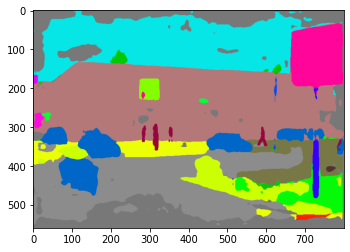

In [12]:
show(decoding_img)